# Airbnb Price Prediction


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Download this dataset from below link
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/tasks?taskId=181

## Importing Library

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

## Loading Dataset

In [73]:
data=pd.read_csv('AB_NYC_2019.csv',encoding= 'unicode_escape')

### Show Dataset

In [74]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Size of Dataset

In [75]:
data.shape

(48895, 16)

### Examine the dataset

In [76]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [78]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Categorical Features

In [113]:
categorical_columns=[column for column in data.columns if data[column].dtypes=='O']
categorical_columns

['neighbourhood_group', 'neighbourhood', 'room_type']

In [82]:
data[categorical_columns].head()

name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood        room_type last_review  
0            Brooklyn    Kensington     Private room  10/19/2018  
1           Manhattan       Midtown  Entire home/apt   5/21/2019  
2           Manhattan        Harlem     Private room         NaN  
3            Brooklyn  Clinton Hill  Entire home/apt    7/5/2019  
4           Manhattan   East Harlem  Entire home/apt  11/19/2018

### Numeric Feature

In [83]:
numeric_columns=[column for column in data.columns if column not in categorical_columns]

In [84]:
data[numeric_columns].head()

id  host_id  latitude  longitude  price  minimum_nights  \
0  2539     2787  40.64749  -73.97237    149               1   
1  2595     2845  40.75362  -73.98377    225               1   
2  3647     4632  40.80902  -73.94190    150               3   
3  3831     4869  40.68514  -73.95976     89               1   
4  5022     7192  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

### Discrete Features

In [85]:
discrete_features=[feature for feature in numeric_columns if len(data[feature].unique())<50]

In [86]:
discrete_features

['calculated_host_listings_count']

### Continuous Features

In [87]:
continuous_feature=[feature for feature in numeric_columns if feature not in discrete_features]

In [88]:
continuous_feature

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365']

## Data Preprocessing

### Count null values in each column

In [89]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop Insignificant Column

In [90]:
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
data.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Examining Changes 

In [91]:
data.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Replace null values of 'Reviews per month' by 0

In [92]:
data.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
# data.reviews_per_month.isnull().sum()
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [93]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.5+ MB


### Examine Continous Variables

In [95]:
data.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

## Exploratory Data Analysis

### Analyzing Numeric and Categorical Features

In [96]:
data['neighbourhood_group'].value_counts().to_frame()

neighbourhood_group
Manhattan                    21661
Brooklyn                     20104
Queens                        5666
Bronx                         1091
Staten Island                  373

In [97]:
data['room_type'].value_counts().to_frame()

room_type
Entire home/apt      25409
Private room         22326
Shared room           1160

In [98]:
df_grp1 = data[['neighbourhood_group','price']].groupby(['neighbourhood_group'],as_index=False).mean()
df_grp1=df_grp1.rename(columns={'price':'average_price'})
df_grp1

neighbourhood_group  average_price
0               Bronx      87.496792
1            Brooklyn     124.383207
2           Manhattan     196.875814
3              Queens      99.517649
4       Staten Island     114.812332

In [99]:
df_grp2 = data[['room_type','price']].groupby(['room_type'],as_index=False).mean()
df_grp2=df_grp2.rename(columns={'price':'average_price'})
df_grp2

room_type  average_price
0  Entire home/apt     211.794246
1     Private room      89.780973
2      Shared room      70.127586

In [100]:
df_grp3 = data[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_grp3 = df_grp3.rename(columns={'price':'average_price'})
df_pivot = df_grp3.pivot(index='room_type',columns='neighbourhood_group')
df_pivot

average_price                                      \
neighbourhood_group         Bronx    Brooklyn   Manhattan      Queens   
room_type                                                               
Entire home/apt        127.506596  178.327545  249.239109  147.050573   
Private room            66.788344   76.500099  116.776622   71.762456   
Shared room             59.800000   50.527845   88.977083   69.020202   

                                   
neighbourhood_group Staten Island  
room_type                          
Entire home/apt        173.846591  
Private room            62.292553  
Shared room             57.444444

### Univariate Analysis

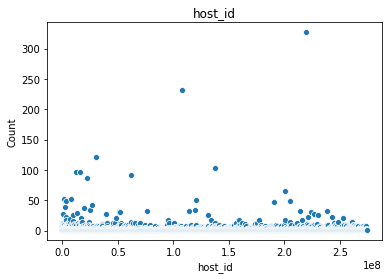

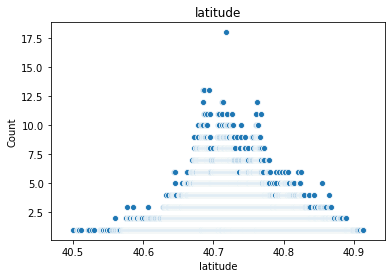

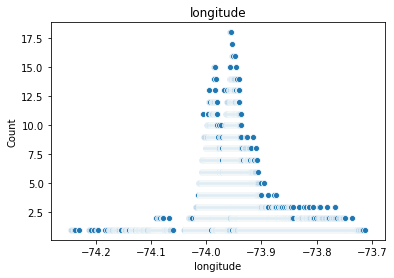

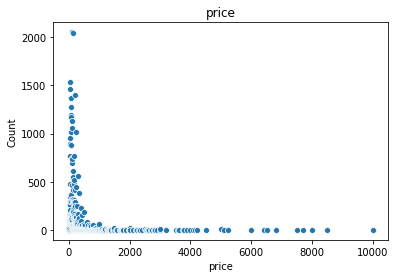

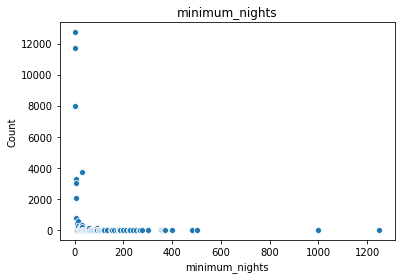

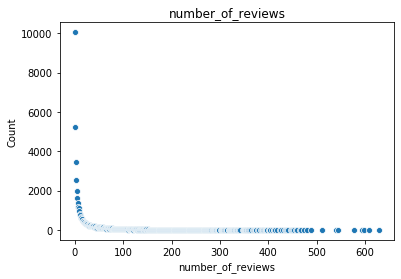

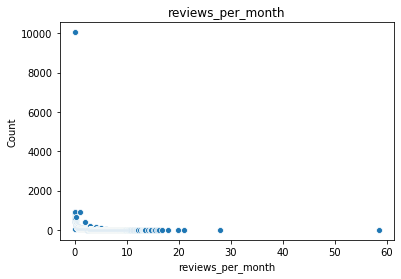

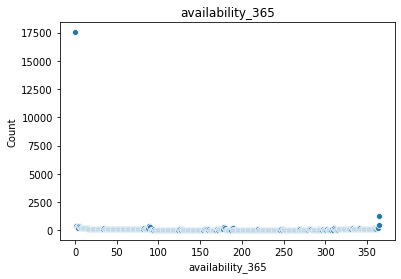

In [101]:
continuous_feature.remove('id')
for feature in continuous_feature:
    data1=data.groupby(feature)
    d=data1[feature].count()
    sns.scatterplot(x=d.index,y=d)
#     data1[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

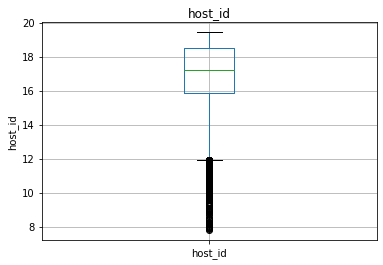

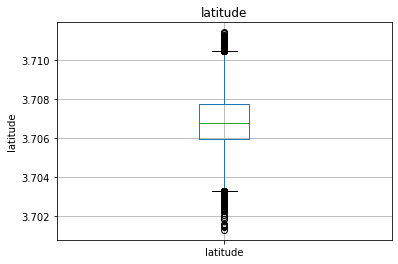

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


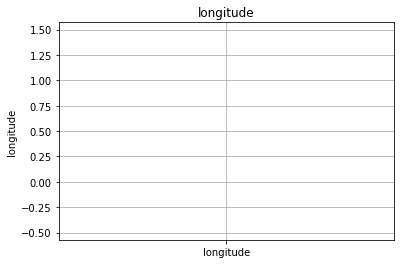

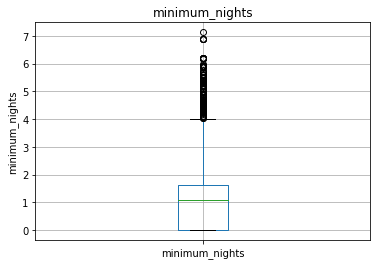

In [102]:
for feature in continuous_feature:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

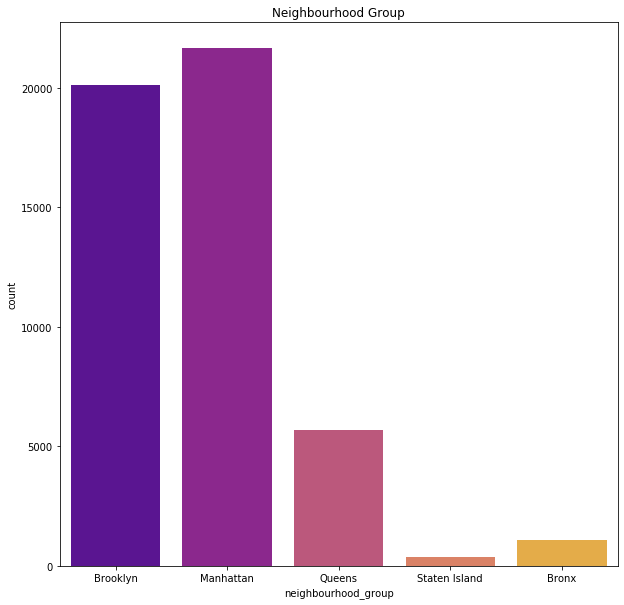

In [103]:
sns.countplot(data['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

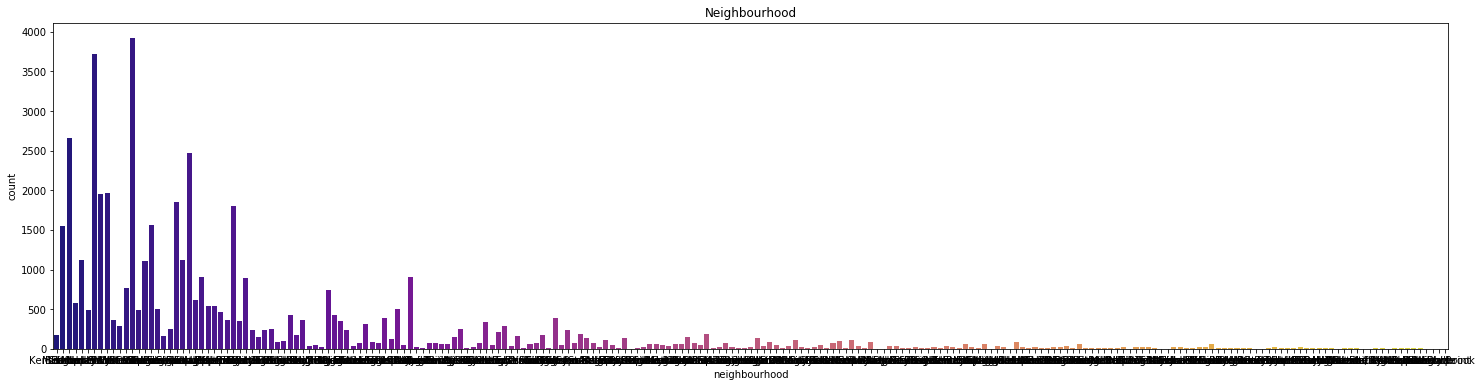

In [104]:
sns.countplot(data['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

### Room Type

Text(0.5, 1.0, 'Room Types')

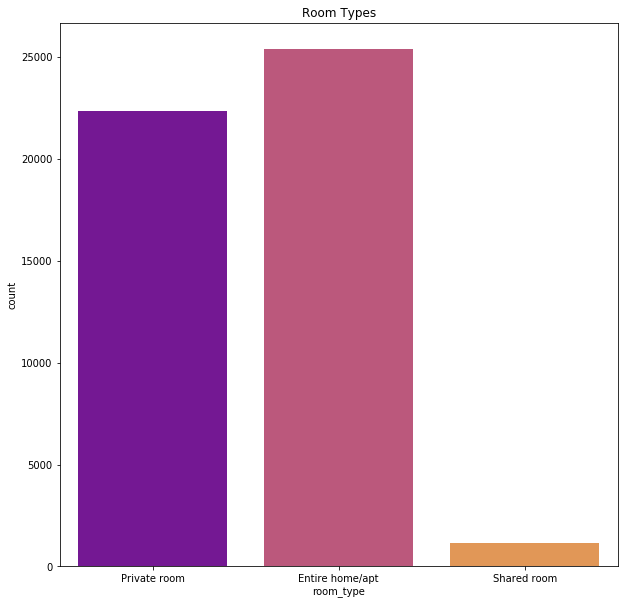

In [105]:
sns.countplot(data['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Types')

### Map of Neighbourhood Group

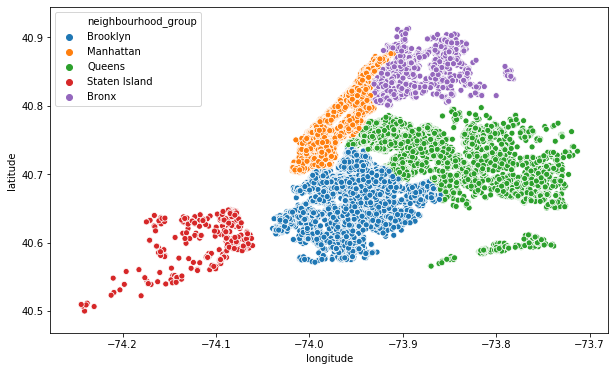

In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

### Map of Neighbourhood

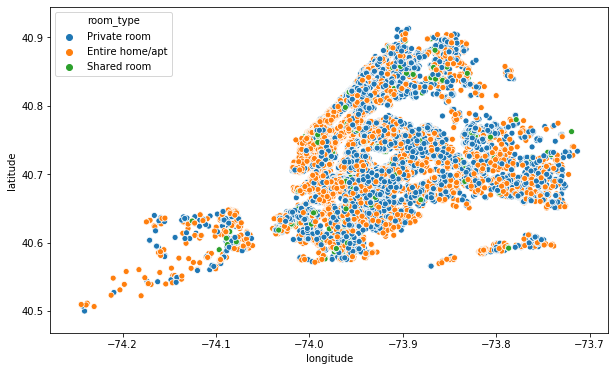

In [107]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.ioff()

### Bivariate Analysis

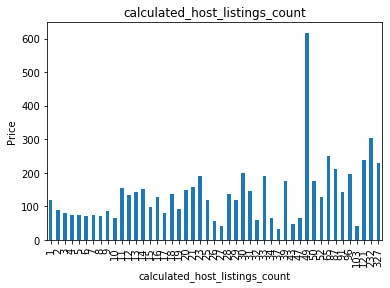

In [108]:
for feature in discrete_features:
    data1=data.copy()
    data1.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


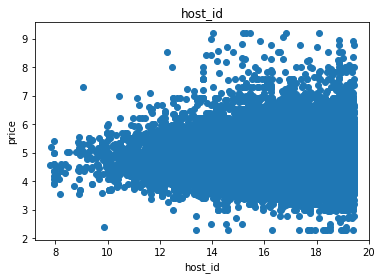

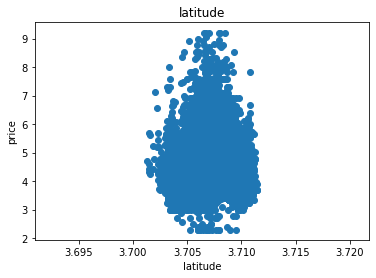

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


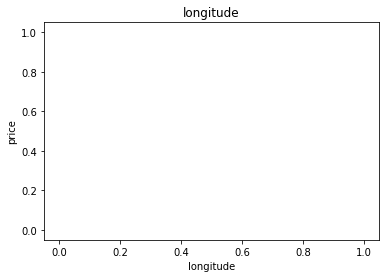

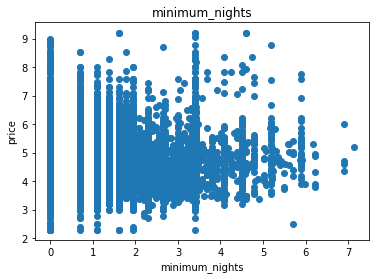

In [109]:
for feature in continuous_feature:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data1['price']=np.log(data1['price'])
        plt.scatter(data1[feature],data1['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()
        

In [114]:
categorical_columns

['neighbourhood_group', 'neighbourhood', 'room_type']

In [115]:
for feature in categorical_columns:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is neighbourhood_group and number of categories are 5
The feature is neighbourhood and number of categories are 221
The feature is room_type and number of categories are 3


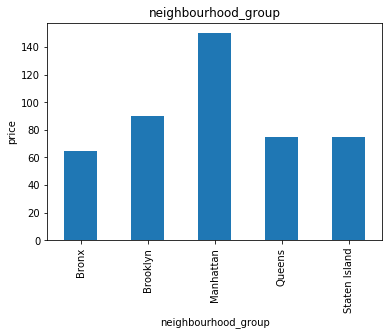

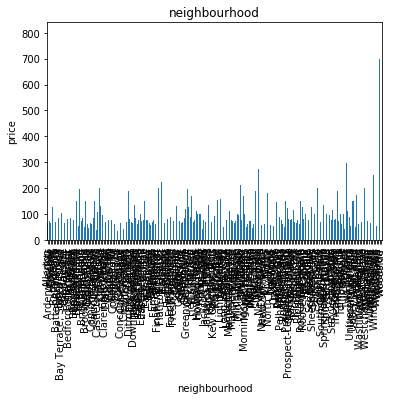

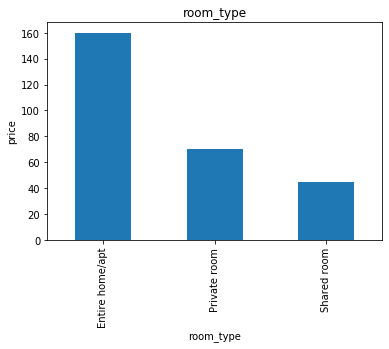

In [116]:
for feature in categorical_columns:
    data1=data.copy()
    data1.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

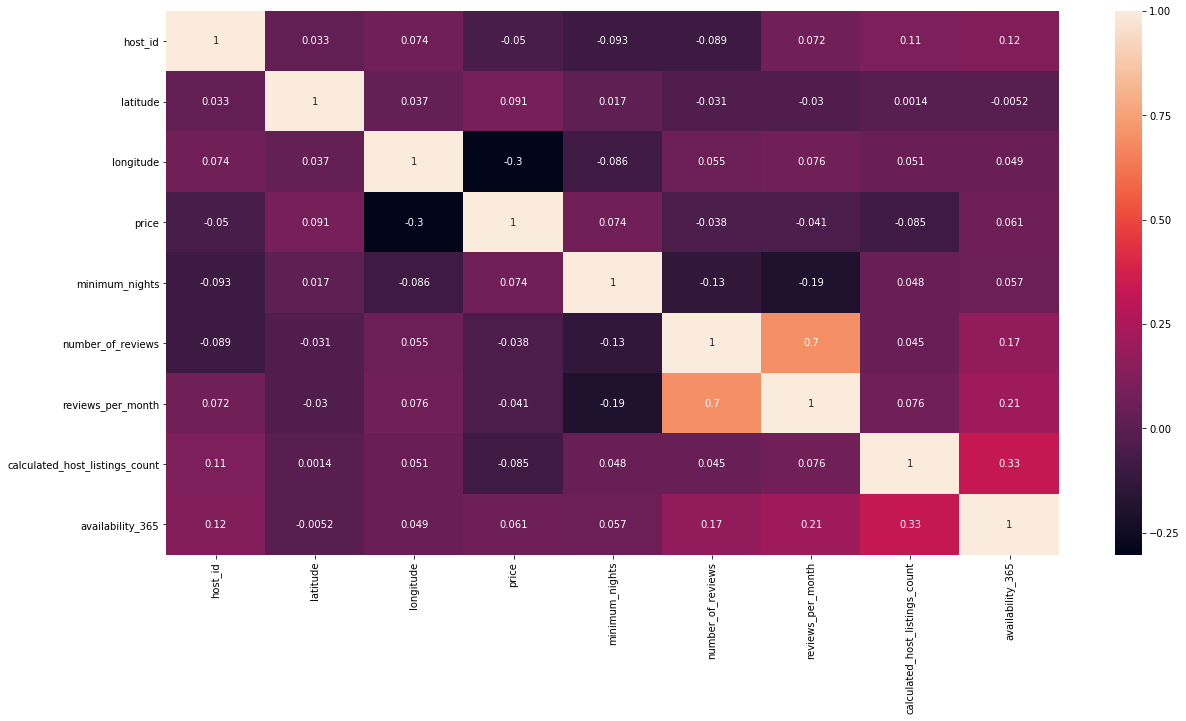

In [117]:
corr = data.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
data.columns

### Relation between neighbourgroup and Availability of Room

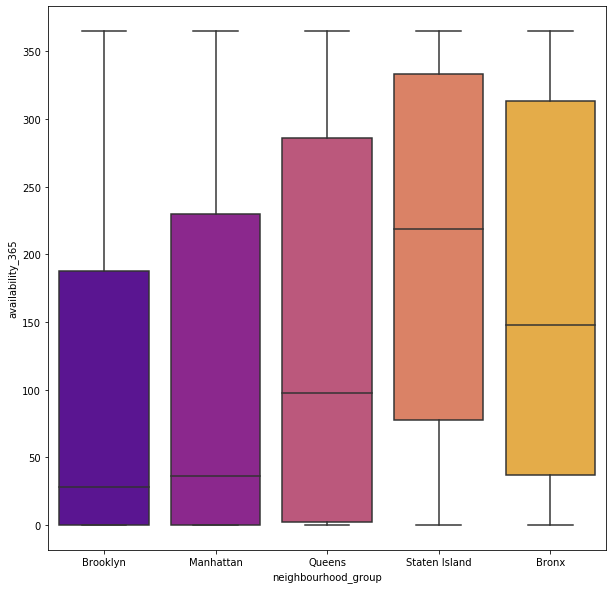

In [119]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

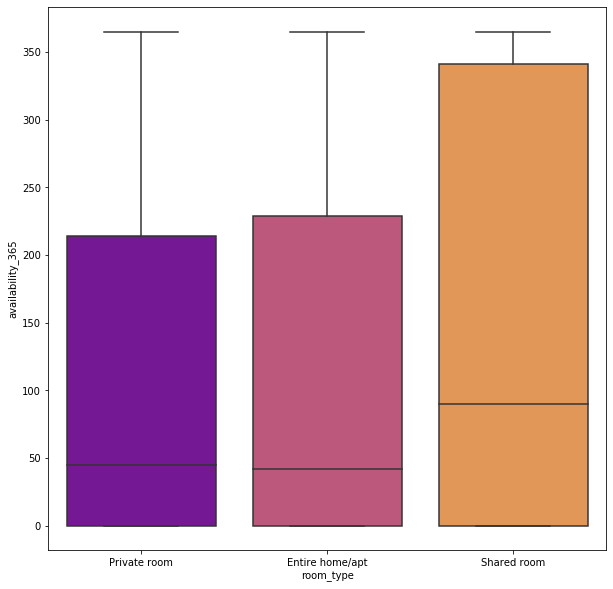

In [120]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='room_type',y='availability_365',palette='plasma')

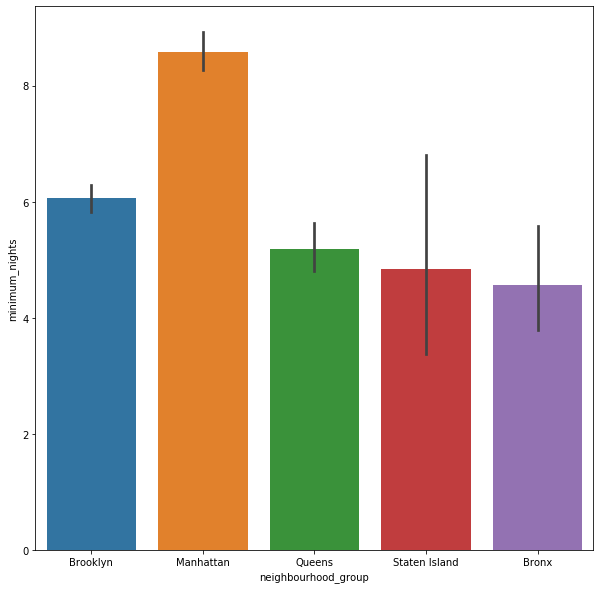

In [121]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=data, x='neighbourhood_group',y='minimum_nights')
plt.show()

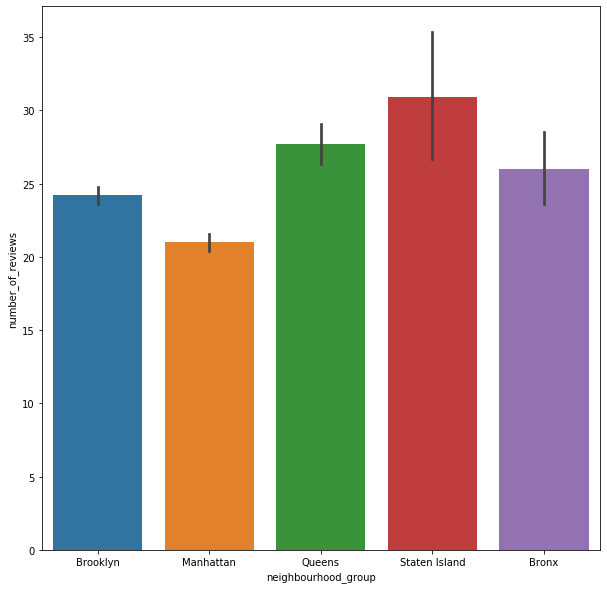

In [122]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=data, x='neighbourhood_group',y='number_of_reviews')
plt.show()

### WordCloud

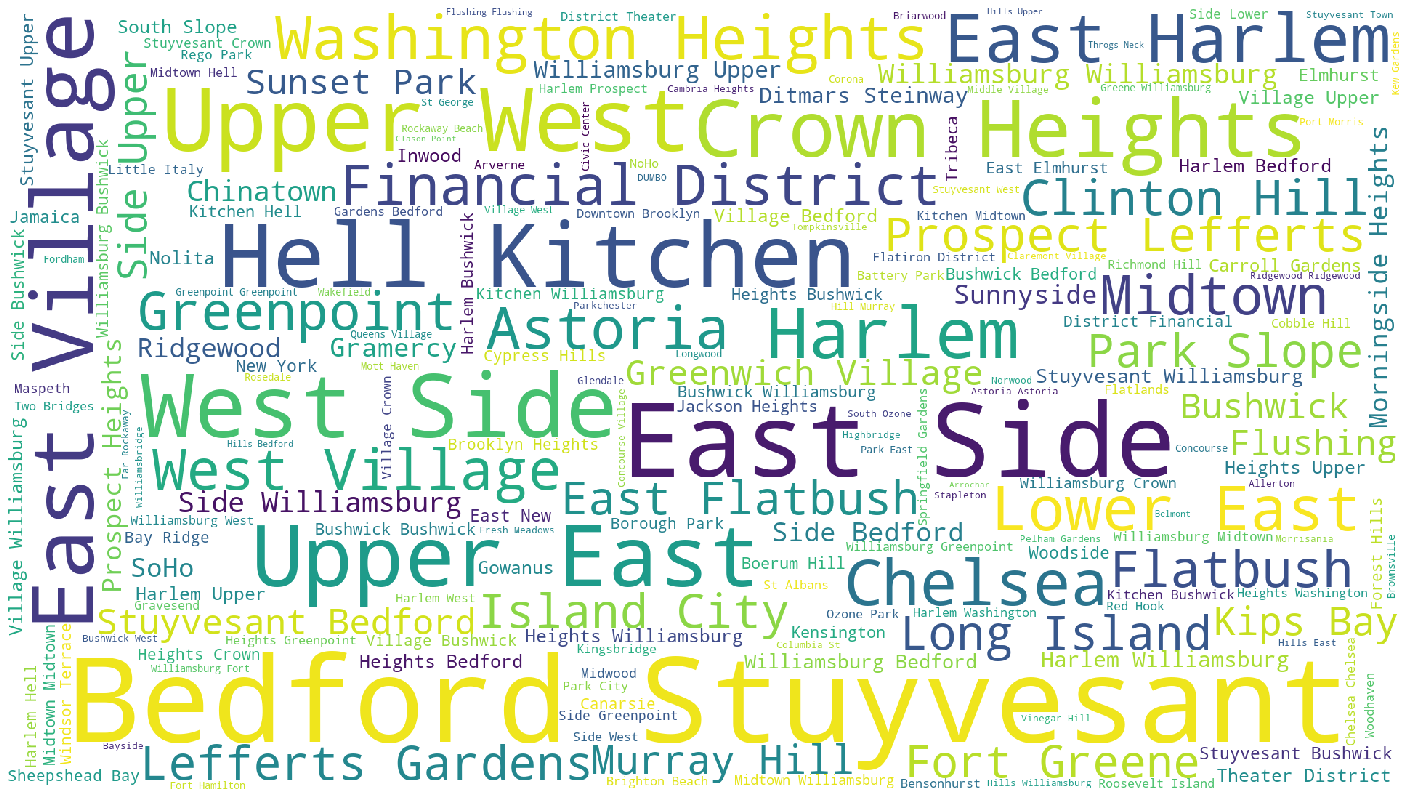

In [123]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
# plt.savefig('neighbourhood.png')
plt.show()

In [124]:
import folium
from folium import plugins
# New York coordinates
lat = 40.7128
lon = -74.0060
ny_map = folium.Map(location=[lat,lon], zoom_start=12)   # create new york map
# instantiate a marker cluster for the airbnb locations in the dataframe
airbnb =  plugins.MarkerCluster().add_to(ny_map)

# randomly select a portion of the data for plotting on the map
df_smp = data.sample(frac=0.1, replace=False, random_state=1)
latitudes = list(df_smp.latitude)
longitudes = list(df_smp.longitude)
price = list(df_smp.price)
labels = ['$'+str(x)+' per night' for x in price]  # add pop-up price to each marker on the map
# loop through the data and add markers to feature group
i = 0
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(airbnb)

ny_map

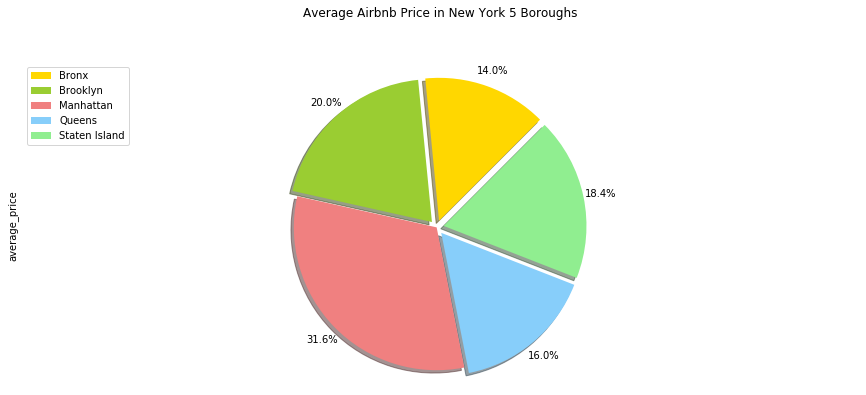

In [125]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.05, 0.05, 0, 0.05, 0.05] # ratio for each feature with which to offset each wedge.

df_grp1['average_price'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Average Airbnb Price in New York 5 Boroughs', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=df_grp1['neighbourhood_group'], loc='upper left') 

plt.show()

## Feature Engineering

In [126]:
Airbnb_data=data.copy()

### Encode categorical features

Encode Room Type:
1. Private Room:1
2. Entire home/apt:2
3. Shared room:3

Encode Neighbourhood Group:
1. Brooklyn:1
2. Manhattan:2
3. Bronx:3
4. Queens:4
5. Staten Island:5

In [127]:
Airbnb_data.loc[Airbnb_data['room_type']=='Private room','room_type']=1
Airbnb_data.loc[Airbnb_data['room_type']=='Entire home/apt','room_type']=2
Airbnb_data.loc[Airbnb_data['room_type']=='Shared room','room_type']=3

Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Brooklyn','neighbourhood_group']=1
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Manhattan','neighbourhood_group']=2
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Bronx','neighbourhood_group']=3
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Queens','neighbourhood_group']=4
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Staten Island','neighbourhood_group']=5


Text(0.5, 1.0, 'Price Distribution Plot')

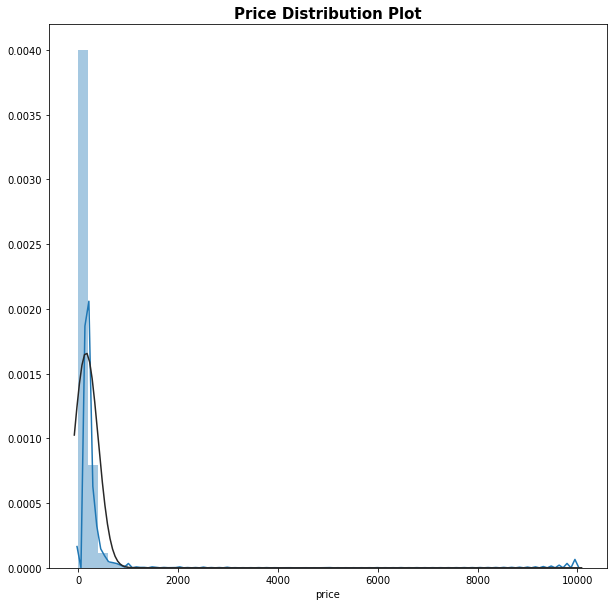

In [128]:
plt.figure(figsize=(10,10))
sns.distplot(Airbnb_data['price'],fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [129]:
Airbnb_data['price_log'] = np.log(Airbnb_data.price+1)

Text(0.5, 1.0, 'Log-Price Distribution Plot')

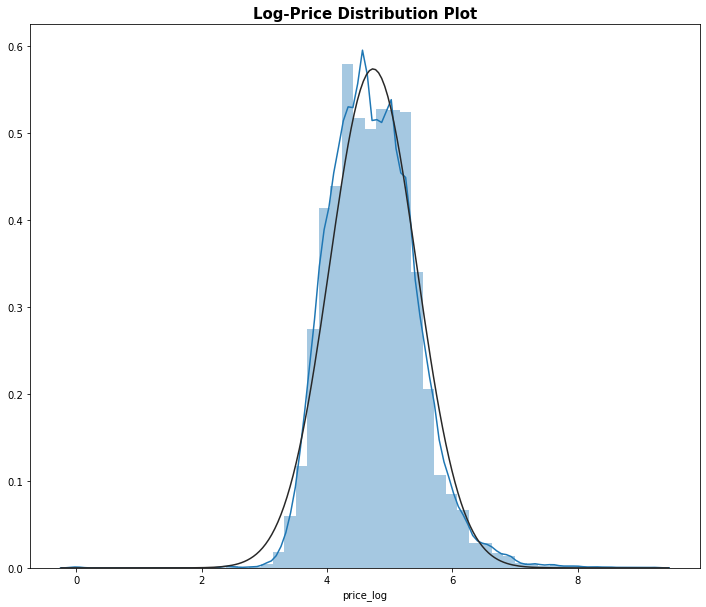

In [130]:
plt.figure(figsize=(12,10))
sns.distplot(Airbnb_data['price_log'],fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [131]:
Airbnb_data.head()

host_id  neighbourhood_group neighbourhood  latitude  longitude  room_type  \
0     2787                    1    Kensington  40.64749  -73.97237          1   
1     2845                    2       Midtown  40.75362  -73.98377          2   
2     4632                    2        Harlem  40.80902  -73.94190          1   
3     4869                    1  Clinton Hill  40.68514  -73.95976          2   
4     7192                    2   East Harlem  40.79851  -73.94399          2   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  price_log  
0                               6               365   5.010635  
1                               2               355   5.420535  
2                               1               365   5.017280  
3                               1               194   4.499810  
4                               1                 0   4.394449

In [132]:
Airbnb_data.drop(['host_id','latitude','longitude','number_of_reviews','reviews_per_month','price'], axis=1, inplace=True)

In [133]:
Airbnb_data.head()

neighbourhood_group neighbourhood  room_type  minimum_nights  \
0                    1    Kensington          1               1   
1                    2       Midtown          2               1   
2                    2        Harlem          1               3   
3                    1  Clinton Hill          2               1   
4                    2   East Harlem          2              10   

   calculated_host_listings_count  availability_365  price_log  
0                               6               365   5.010635  
1                               2               355   5.420535  
2                               1               365   5.017280  
3                               1               194   4.499810  
4                               1                 0   4.394449

### Encoding Neighbourhood

In [134]:
labels_ordered=Airbnb_data.groupby(['neighbourhood'])['price_log'].mean().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
Airbnb_data['neighbourhood']=Airbnb_data['neighbourhood'].map(labels_ordered)

In [135]:
Airbnb_data.head()

neighbourhood_group  neighbourhood  room_type  minimum_nights  \
0                    1             88          1               1   
1                    2            212          2               1   
2                    2            139          1               3   
3                    1            167          2               1   
4                    2            148          2              10   

   calculated_host_listings_count  availability_365  price_log  
0                               6               365   5.010635  
1                               2               355   5.420535  
2                               1               365   5.017280  
3                               1               194   4.499810  
4                               1                 0   4.394449

### Correlation Matrix

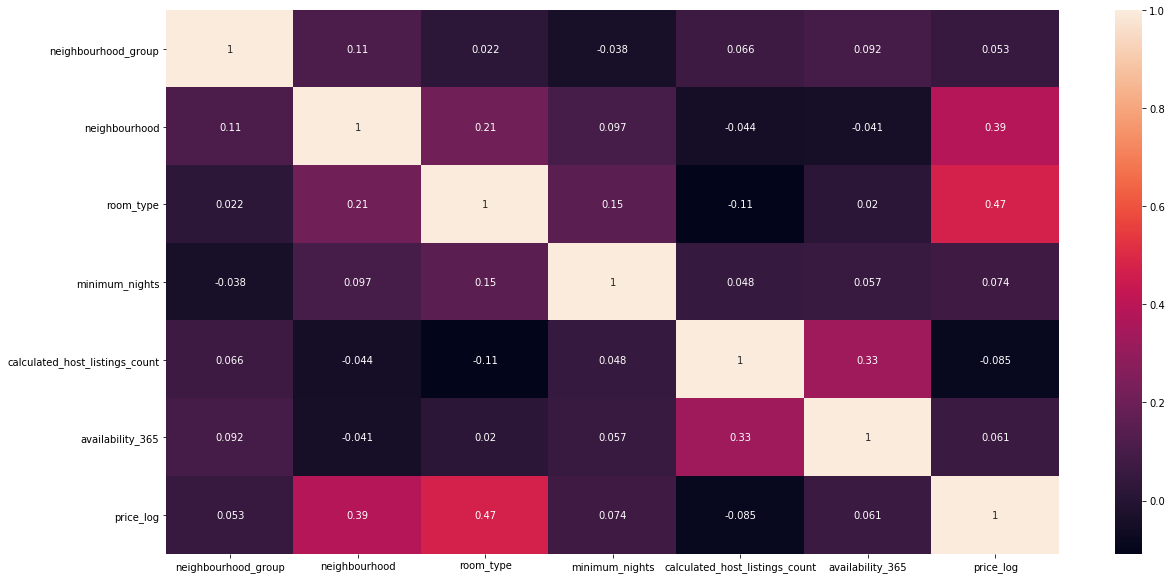

In [136]:
corr = Airbnb_data.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Applying Machine Learning Model

### Spliting dependent and independent features

In [137]:
y=Airbnb_data['price_log']
x=Airbnb_data.drop(['price_log'],axis=1)
x.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Linear Regression

R-squared train score of Linear Regression: 0.394
R-squared test score of Linear Regression: 0.410
0.28820012078194057


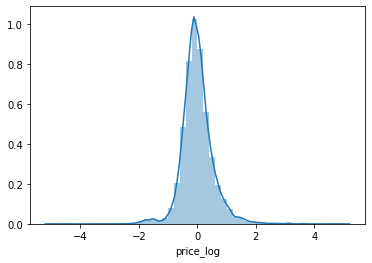

In [139]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error 

linreg = LinearRegression()
linreg.fit(x_train,y_train)
Y_lr=(linreg.predict(x_test))
score_logreg = linreg.score(x_test,y_test)
print('R-squared train score of Linear Regression: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score of Linear Regression: {:.3f}'.format(linreg.score(x_test, y_test)))
print(mean_squared_error(y_test,Y_lr))
sns.distplot(y_test-Y_lr)

Text(0, 0.5, 'Test')

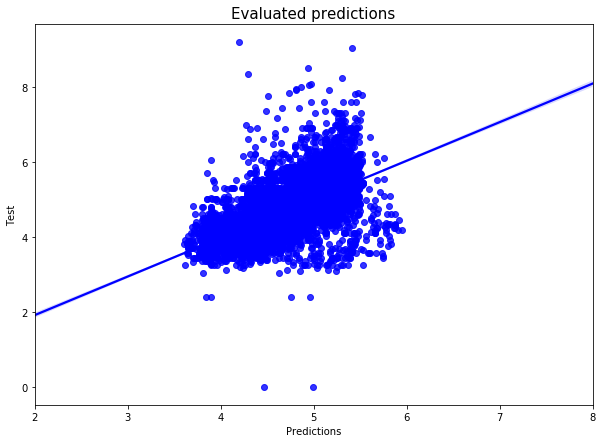

In [140]:
plt.figure(figsize=(10,7))
plt.xlim(2,8)
sns.regplot(y=y_test, x=Y_lr, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')


### Ridge Regression

R-squared train score of Ridge regression: -0.292
R-squared test score of Ridge Regression: -0.288


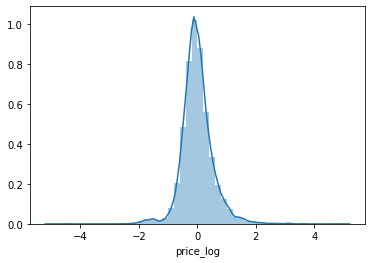

In [141]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(x_train, y_train)
y_ridge=ridge_reg.predict(x_test)
print('R-squared train score of Ridge regression: {:.3f}'.format(ridge_reg.score(x_train, y_train)))
print('R-squared test score of Ridge Regression: {:.3f}'.format(ridge_reg.score(x_test, y_test)))
score_ridge=ridge_reg.score(x_test, y_test)
sns.distplot(y_test-y_ridge)

Text(0, 0.5, 'Test')

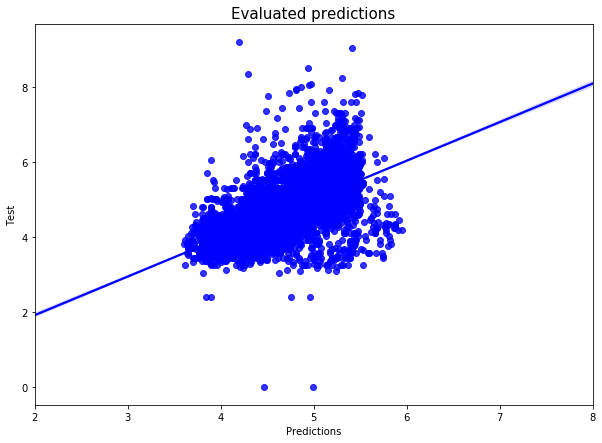

In [142]:
plt.figure(figsize=(10,7))
plt.xlim(2,8)
sns.regplot(y=y_test, x=y_ridge, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

### Lasso Regression

R-squared score (training) of Lasso Regression: 0.169
R-squared score (test) of Lasso Regression: 0.170


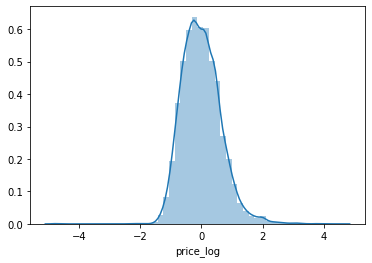

In [143]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)
score_lasso = lasso.score(x_test,y_test)
y_lasso=lasso.predict(x_test)
print('R-squared score (training) of Lasso Regression: {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test) of Lasso Regression: {:.3f}'.format(lasso.score(x_test, y_test)))
# print('R-squared test score: {:.3f}'.format(r2_score(y_test, y_lasso)))
sns.distplot(y_test-y_lasso)

Text(0, 0.5, 'Test')

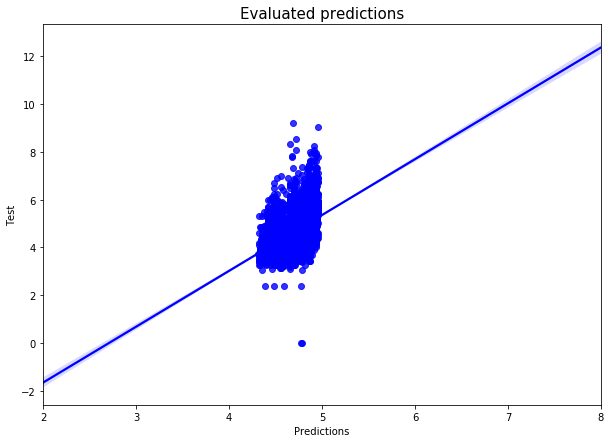

In [144]:
plt.figure(figsize=(10,7))
plt.xlim(2,8)
sns.regplot(y=y_test, x=y_lasso, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

### Decision Tree Regression

R-squared score (training): 0.716
R-squared score (test): 0.500


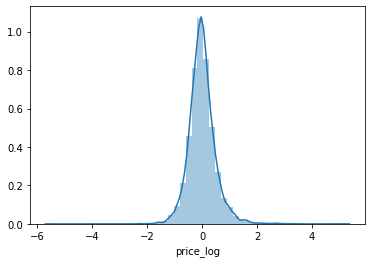

In [145]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_Dtree=DTree.predict(x_test)
score_Dtree=DTree.score(x_test, y_test)
print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))
sns.distplot(y_test-y_Dtree)

Text(0, 0.5, 'Test')

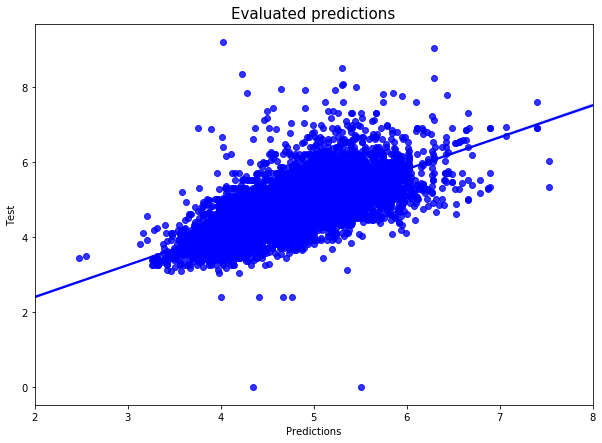

In [146]:
plt.figure(figsize=(10,7))
plt.xlim(2,8)
sns.regplot(y=y_test, x=y_Dtree, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

In [147]:
results=[score_logreg,-score_ridge,score_lasso,score_Dtree]
names=["LR","Ridge","Lasso","DTree"]
results

[0.4100925756274969,
 0.2882051977935124,
 0.1697860293987261,
 0.5003170400785233]

In [148]:
df=pd.DataFrame(list(zip(results,names)),columns=['r2_score','name'])
df

r2_score   name
0  0.410093     LR
1  0.288205  Ridge
2  0.169786  Lasso
3  0.500317  DTree

### Algorithm Comparison

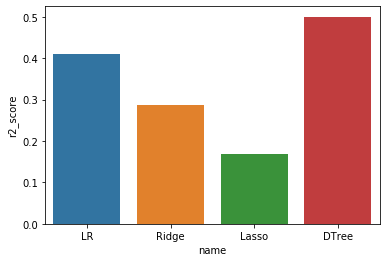

In [149]:
sns.barplot(x='name',y='r2_score',data=df)
plt.show()

In [116]:
import pickle
# Saving model to disk
pickle.dump(DTree, open('model_pred.pkl','wb'))
#print(xTest.info())
#print(yTest.info())


In [119]:
# # Loading model to compare the results
# import math
# model = pickle.load(open('model_pred.pkl','rb'))
# # model.score(xTest,yTest)
# print(math.exp(model.predict([[2,3,6,4,5,50]])))

In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [ ]:
# import xgboost
# classifier=xgboost.XGBClassifier()
# random_serach=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# random_serach.fit(x_train,y_train)

# print('R-squared score (training): {:.3f}'.format(random_serach.score(x_train, y_train)))
# print('R-squared score (test): {:.3f}'.format(random_serach.score(x_test, y_test)))

In [ ]:
scaling_feature=[feature for feature in Airbnb_data.columns if feature not in ['price_log','neighbourhood_group','room_type']]
len(scaling_feature)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Airbnb_data[scaling_feature])

In [ ]:
scaler.transform(Airbnb_data[scaling_feature])

In [ ]:
scale_data = pd.concat([Airbnb_data[['price_log','neighbourhood_group','room_type']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(Airbnb_data[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [ ]:
scale_data.head()

In [ ]:
Y=scale_data['price_log']

In [ ]:
X=scale_data.drop(['price_log'],axis=1)

In [ ]:
# from sklearn.cluster import KMeans
# wcss=[]
# for i in range(1,11):
#     kmeans= KMeans(n_clusters=i,init='k-means++',random_state=30)
#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(range(1,11),wcss)
# plt.title("Elbow Method")
# plt.xlabel("No of cluster")
# plt.ylabel("wcss")
# plt.show()

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train.head()

In [ ]:
Y_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred=(linreg.predict(X_test))
# score_logreg = linreg.score(X_test,Y_test)
# plt.scatter(X_test, Y_test,  color='black')
# plt.plot(X_test, Y_test, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()
# mse=cross_val_score(linreg,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
# mean_mse=np.mean(mse)
# print(mean_mse)
print('R-squared train score: {:.3f}'.format(linreg.score(X_train, Y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(X_test, Y_test)))
sns.distplot(Y_test-Y_pred)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)

y_pred=ridge.predict(X_test)
score_ridge = ridge.score(X_test,Y_test)

print('R-squared train score: {:.3f}'.format(ridge.score(X_train, Y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(X_test, Y_test)))
# print('Accuracy score of linear Regression is {}'.formatscore_ridge)
sns.distplot(Y_test-y_pred)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(X_train, Y_train)
score_lasso = lasso.score(X_test,Y_test)
Y_lasso=lasso.predict(X_test)
print('R-squared score (training): {:.3f}'.format(lasso.score(X_train, Y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(X_test, Y_test)))
sns.distplot(Y_test-Y_lasso)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,Y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(X_train, Y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(X_test, Y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(X_train, Y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(X_train, Y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, Y_test)))